# Exploring Dandiset 001363: Neural Spiking Data in the Rat Somatosensory Cortex

This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Caution should be exercised when interpreting the code or results.

## Overview of Dandiset 001363

**Title**: Neural Spiking Data in the Rat Somatosensory Cortex Using a Flexible Electrode Responding to Transcranial Focused Ultrasound

**Description**: In this study, we investigate the neuronal response to transcranial focused ultrasound stimulation (tFUS) on the somatosensory cortex using an ultra-flexible electrode. We examine different ultrasound pressures, duty cycles, and frequencies.

**Neurosift Link**: [View on Neurosift](https://neurosift.app/dandiset/001363)

### What This Notebook Covers
- Loading the Dandiset using the DANDI API
- Accessing and analyzing data in NWB files
- Visualizing selected data for exploratory analysis

## Required Packages
- pynwb
- h5py
- remfile
- matplotlib
- numpy

## Loading the Dandiset
This section demonstrates how to connect to the DANDI archive and load the assets.

In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001363")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 55 assets in the dataset

First 5 assets:
- sub-BH643/sub-BH643_ecephys.nwb
- sub-BH643/sub-BH643_ses-20241220T182204_ecephys.nwb
- sub-BH643/sub-BH643_ses-20241220T174647_ecephys.nwb
- sub-BH643/sub-BH643_ses-20241220T195303_ecephys.nwb
- sub-BH643/sub-BH643_ses-20241220T180423_ecephys.nwb


## Exploring an NWB File
We'll examine one of the NWB files and display some metadata and a segment of the data to gain insights into the dataset.

In [2]:
import pynwb
import h5py
import remfile
import numpy as np

# Load the NWB file using the URL
url = "https://api.dandiarchive.org/api/assets/59d1acbb-5ad5-45f1-b211-c2e311801824/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file, 'r')
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Display some basic information
print("Session Description:", nwb.session_description)
print("Session Start Time:", nwb.session_start_time)
print("Identifier:", nwb.identifier)

Session Description: Rat Ultrasound Array Stimulation
Session Start Time: 2024-08-27 16:04:57-04:00
Identifier: BH589_1500_200_67_25V


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Visualizing Data from 'ElectricalSeries'
Let’s now visualize a subset of the electrical data to uncover basic signal characteristics.

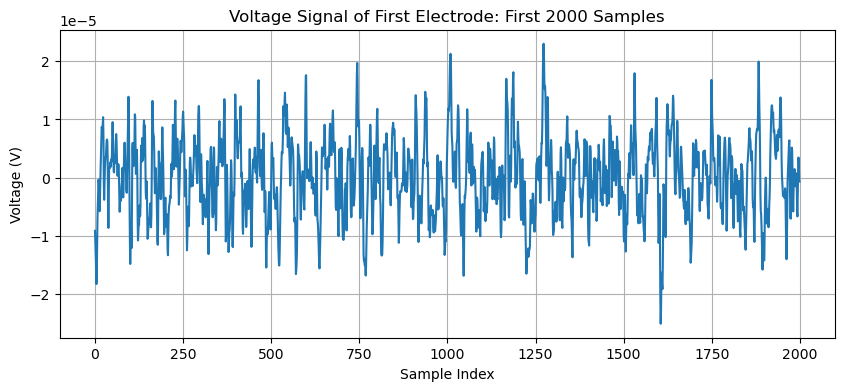

In [3]:
import matplotlib.pyplot as plt

# Access the ElectricalSeries
electrical_series = nwb.acquisition['ElectricalSeries']

# Load a subset of data: first 2000 samples from the first electrode
data_subset = electrical_series.data[:2000, 0]

# Create a plot of the data
plt.figure(figsize=(10, 4))
plt.plot(data_subset)
plt.title('Voltage Signal of First Electrode: First 2000 Samples')
plt.xlabel('Sample Index')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.show()

io.close()
h5_file.close()
remote_file.close()

## Summary and Future Directions
The analysis presented here provides a starting point for examining neural spiking data within this Dandiset. Future efforts may focus on deeper dives into specific experimental conditions or more complex visualizations involving multiple electrodes or broader timescales.